<a href="https://colab.research.google.com/github/ollihansen90/Mathe-SH/blob/main/Nerdle_random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nerdle (random)

## 🤔 Fragen? 🤔
Solltet ihr Fragen zum Code oder Probleme mit Colab haben, schickt uns gerne eine Mail:
- h.hansen@uni-luebeck.de
- friederike.meissner@student.uni-luebeck.de
- dustin.haschke@student.uni-luebeck.de
- mika.kohlhammer@student.uni-luebeck.de

# Nerdle (Random-Variante)
Wir wollen heute das Spiel Nerdle in Python implementieren!
Dafür wollen wir Python eine zufällige korrekte Gleichung finden lassen.


---



Zunächst erstellen wir dafür unterschiedliche Listen der erlaubten Zeichen, die wir später zum Prüfen benötigen. Im Anschluss nutzen wir die eval()-Funktion, um den Term auszuwerten.

Danach überlegen wir uns Prüfkriterien, ob tatsächlich die klassische Nerdle-Form, also sowas wie `89-13=76` vorliegt. Nun benötigen wir noch die klassische Farbkodierung von Nerdle, die anzeigt, ob die Zahlen richtig oder sogar in richtiger Position sind...


... und danach können wir zufällige Gleichungen erstellen, von denen uns eine als Spiel vorgegeben wird. :-)

Zunächst brauchen wir eine bestimmte Gesamtlänge der Gleichung:

In [1]:
n = int(input("Gib die Länge der Gleichung an!\n"))

Gib die Länge der Gleichung an!
8


## Erstelle Listen der Zeichen & Zahlen ➕➖✖️➗🔢

Um später die Eingabe zu prüfen und mit der Lösung zu vergleichen, brauchen wir verschiedene Listen, die alle möglichen Ziffern und Operatoren sowie das Gleichheitszeichen als *character* enthalten.

Definiere dafür folgende Listen:

1.  alle Ziffern, ohne die Null
2.  alle Ziffern, mit der Null
3.  alle zulässigen Operatoren (Addition, Subtraktion, Multiplikation, Division)
4.  alle zulässigen Operatoren und das Gleichheitszeichen
5.  alle zulässigen Zeichen (Ziffern, Operatoren, Gleichheitszeichen).  



In [2]:
zahlen = ["1","2","3","4","5","6","7","8","9"]
zahlen_null = ["0","1","2","3","4","5","6","7","8","9"]
zeichen = ["+","-","*","/"]
zeichen_gleich = ["+","-","*","/","="]
zahlen_zeichen = ["0","1","2","3","4","5","6","7","8","9","+","-","*","/"]

# alternativ
zahlen = list("123456789")
zahlen_null = ["0"] + zahlen
zeichen = list("+-*/")
zeichen_gleich = zeichen + ["="]
zahlen_zeichen = zahlen_null + zeichen

## Prüfe Länge der Eingabe 🔎📐

Zuerst überprüfen wir, ob die übergebene `gleichung` die eben festgelegte Länge `n` besitzt. Ergänze dafür den Rumpf der Funktion `richtige_laenge`, die `True` zurückgeben soll, wenn `gleichung` `n` Zeichen lang ist, und sonst `False`.

In [3]:
def richtige_laenge(gleichung):
    return len(gleichung) == n

## Prüfe zulässige Zahlen und Zeichen 🔎🔢➕➖✖️➗

Jetzt müssen wir sicherstellen, dass die `gleichung` nur aus Zahlen, den Operatoren +, -, *, / und dem Gleichheitszeichen besteht. Vervollständige dafür die Funktion `zahlen_und_zeichen`, die `True` zurückgeben soll, wenn nur zulässige Zeichen bzw. Zahlen enthalten sind, und sonst `False`.

In [4]:
def zahlen_und_zeichen(gleichung):
    for zeichen in gleichung:
        if zeichen not in zahlen_zeichen:
            return False
    return True


## Prüfe Gleichheitszeichen 🟰✔️

Hier überprüfen wir, ob die `gleichung` nur ein einziges Gleichheitszeichen enthält und ob darauf eine Ziffer folgt. Ergänze also die Funktion `genau_ein_gleich`, die nur dann `True` zurückgibt, wenn beide Eigenschaften erfüllt sind, und sonst `False`.

In [5]:
def genau_ein_gleich(gleichung):
    if gleichung.count("=") != 1:
        return False
    gleich_position = gleichung.index("=")
    #n = len(gleichung)
    #if gleich_position < (n-1)/2 or gleich_position == n-1:
    #   return False
    if not gleichung[gleich_position+1:].isdigit():
        return False
    else:
        return True

# alternativ
def genau_ein_gleich(gleichung):
    if len(gleichung.split("=")) != 2:
        return False

    links, rechts = gleichung.split("=")
    for zeichen in rechts:
        if zeichen not in zahlen_null:
            return False
    return True

## Prüfe Gleichheit 🍏=🍐

Implementiere die Funktion `gilt_gleichung`, die für die übergebene `gleichung` prüft, ob die linke Seite der rechten Seite entspricht, und den entsprechenden Wahrheitswert zurückgibt. Die Rechnung links des Gleichheitszeichens soll also zum angegebenen Ergebnis auf der rechten Seite des Gleichheitszeichens passen.

In [6]:
def gilt_gleichung(gleichung):
    links, rechts = gleichung.split("=")
    return eval(links) == eval(rechts)

## Prüfe Anfang & Ende Ⓐ👶👴♎

Vervollständige die Funktion `anfang_und_ende`, die als Boolean zurückgibt, ob das erste Zeichen der übergebenen `gleichung` eine Zahl größer 0 und das letzte Zeichen eine Zahl größer oder gleich 0 ist.

In [7]:
def anfang_und_ende(gleichung):
    #if gleichung[0] in zahlen and gleichung[-1] in zahlen_null:
    #    return True
    #else:
    #    return False
    return gleichung[0] in zahlen and gleichung[-1] in zahlen_null

## Prüfe Vorgänger und Nachfolger ➡️

Um sicherzustellen, dass vor und nach jedem Operator eine Zahl steht, nach dem Operator jedoch keine 0, verwenden wir die Funktion `operator_nachfolger`. Ergänze dafür den Funktionsrumpf entsprechend.

In [8]:
def operator_nachfolger(gleichung):
    k = len(gleichung)
    for i in range(k-1):
        if gleichung[i] in zeichen_gleich:
            if not (gleichung[i+1] in zahlen and gleichung[i-1] in zahlen_null):
                if gleichung[i] == "=" and gleichung[i+1] == "0" and i == k-2:  # Fall wird doppelt betrachtet => in genau_ein_gleich sonderfall?
                    break
                else:
                    return False
    return True

# alternativ
def operator_nachfolger(gleichung):
    for operator in "+-*/=":
        for abschnitt in gleichung.split(operator):
            if len(abschnitt) == 0 or abschnitt[0] in list("0+-*/="):
                return False
    return True

## Führe Prüfungen zusammen 🔗

Jetzt wollen wir die zuvor definierten Anforderungen an die Eingabe in einer einzigen Funktion `pruefe_eingabe` zusammenführen. Sie soll also nur dann `True` zurückgeben, wenn
* die Eingabe genau `n` Zeichen lang ist (`richtige_laenge`),
* die Eingabe nur aus zulässigen Zahlen und Zeichen besteht (`zahlen_und_zeichen`),
* die Eingabe genau ein Gleichheitszeichen enthält, das nicht an erster oder letzter Stelle steht (`genau_ein_gleich`),
* das erste sowie letzte Zeichen eine Zahl sind, das erste jedoch keine Null ist (`anfang_und_ende`),
* jeder Operator von Zahlen eingeschlossen wird (`operator_nachfolger`)
* und die linke Seite der rechten Seite entspricht (`gilt_gleichung`),

sonst ist der Rückgabewert `False`.

In [9]:
def pruefe_eingabe(eingabe):
    #if not (genau_ein_gleich(eingabe) and anfang_und_ende(eingabe) and operator_nachfolger(eingabe)):
    #    return False
    #if not gilt_gleichung(eingabe):
    #    return False
    #return True
    return richtige_laenge(eingabe) and zahlen_und_zeichen(eingabe) and genau_ein_gleich(eingabe) and anfang_und_ende(eingabe) and operator_nachfolger(eingabe) and gilt_gleichung(eingabe)

# alternativ
def pruefe_eingabe(gleichung):
    if len(gleichung)!=8:
        return False

    for zeichen in gleichung:
        if zeichen not in list("0123456789+-*/="):
            return False

    for operator in "+-*/=":
        for abschnitt in gleichung.split(operator):
            if len(abschnitt) == 0 or abschnitt[0] in list("0+-*/="):
                return False

    if len(gleichung.split("=")) != 2:
        return False

    links, rechts = gleichung.split("=")

    for zeichen in rechts:
        if zeichen not in list("0123456789"):
            return False

    if eval(links) != eval(rechts):
        return False

    return True

## Bewerte Eingabe 🔎📊⚖️🤔

Implementiere nun eine Funktion `werte_eingabe()`, die überprüft, ob die beiden Argumente `eingabe` und `loesung` übereinstimmen. Unterscheide dabei, ob jedes Zeichen bereits
* an richtiger Position ist,
* enthalten, aber an falscher Position ist,
* oder überhaupt nicht in der Lösung vorkommt.

Entsprechend sollen die Zeichen der Eingabe in verschiedenen Farben auf der Konsole ausgegeben werden. Um die Farbe zu verändern, hänge einen ANSI-Farbcode dieser Form `'\033[qqm'` vor den String. `'\033[0m'` setzt die Farbe wieder zurück auf schwarz.

https://www.w3schools.com/colors/colors_picker.asp

Prüfe jedoch zuerst, ob `eingabe` auch die vorher definierten Anforderungen (siehe vorherige Aufgabe) erfüllt.

In [10]:
def werte_eingabe(eingabe, loesung):
    rot = "\x1b[48;2;256;179;179m"
    gruen = "\x1b[48;2;153;255;153m"
    gelb = "\x1b[48;2;255;255;128m"
    end = "\033[0m"
    ausgabe = ""

    for i in range(len(eingabe)):
        if eingabe[i]==loesung[i]:
            ausgabe = ausgabe+gruen+eingabe[i]+end
        elif eingabe[i] in loesung:
            ausgabe = ausgabe+gelb+eingabe[i]+end
        else:
            ausgabe = ausgabe+rot+eingabe[i]+end
    return ausgabe

eingabe = "35/7+3=8"
loesung = "140/20=7"
print(werte_eingabe(eingabe, loesung))

35/7+3=8


## Spiel

In [12]:
eingabe = ""
loesung = "140/20=7"
loesung = generiere_loesung(n=8)
nochuebrig = "".join(zahlen_zeichen+["="])
versuche = 0

while eingabe!=loesung:
    eingabe = input("Gib eine Gleichung der Länge 8 ein: ")
    while not pruefe_eingabe(eingabe):
        print("Unzulässige Gleichung!")
        eingabe = input("Gib eine Gleichung der Länge 8 ein: ")
    print(werte_eingabe(eingabe, loesung))
    for zeichen in eingabe:
        nochuebrig = nochuebrig.replace(zeichen, ".")
    print(nochuebrig)
    versuche = versuche+1
print("Korrekt, sehr gut! Du hast "+str(versuche)+" Versuche gebraucht!")

Gib eine Gleichung der Länge 8 ein: 5+2=4
Unzulässige Gleichung!
Gib eine Gleichung der Länge 8 ein: 5+2+1=8
Unzulässige Gleichung!
Gib eine Gleichung der Länge 8 ein: 120/6=20
120/6=20
...345.789+-*..


KeyboardInterrupt: Interrupted by user

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', '-', '*', '/', '=']

## Zufällige Gleichung 🎲🤪

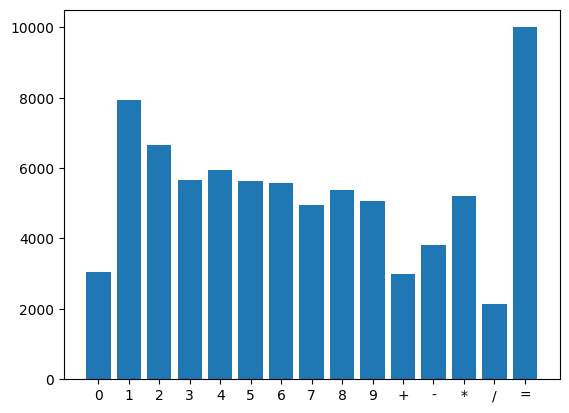

In [281]:
import random
#print(random.randint(0,123))
#print(round(123*random.random()))
zahlen = ["1","2","3","4","5","6","7","8","9"]
zahlen_null = ["0","1","2","3","4","5","6","7","8","9"]
zeichen = ["+","-","*","/"]
zeichen_gleich = ["+","-","*","/","="]
zahlen_zeichen = ["0","1","2","3","4","5","6","7","8","9","+","-","*","/"]
alles = zahlen_zeichen + ["="]

def generiere_loesung(n=8):
    loesung = "140/20=7"
    loesung = ""
    gleichposition = random.randint(4,6)
    counter = 0
    zahlen = ["1","2","3","4","5","6","7","8","9"]
    zahlen_null = ["0","1","2","3","4","5","6","7","8","9"]
    zeichen = ["+","-","*","/"]
    zeichen_gleich = ["+","-","*","/","="]
    zahlen_zeichen = ["0","1","2","3","4","5","6","7","8","9","+","-","*","/"]

    while not pruefe_eingabe(loesung):
        counter += 1
        loesung = ""
        linkeseite = ""
        rechteseite = ""
        for i in range(gleichposition):
            if i==0 or linkeseite[i-1] in zeichen:
                linkeseite = linkeseite + zahlen[random.randint(0, len(zahlen)-1)]
            elif i==gleichposition-1:
                linkeseite = linkeseite + zahlen_null[random.randint(0, len(zahlen_null)-1)]
            else:
                linkeseite = linkeseite + zahlen_zeichen[random.randint(0, len(zahlen_zeichen)-1)]

        rechteseite = str(round(eval(linkeseite)))
        loesung = linkeseite+"="+rechteseite
    return loesung

zeichendict = {k:0 for k in alles}
for i in range(10000):
    l = generiere_loesung(8)
    for z in l:
        zeichendict[z] += 1

import matplotlib.pyplot as plt
plt.figure()
plt.bar(zeichendict.keys(), zeichendict.values())
plt.show()

In [277]:
eingabe = ""
loesung = "140/20=7"
loesung = generiere_loesung(n=8)
nochuebrig = "".join(zahlen_zeichen+["="])
versuche = 0

while eingabe!=loesung:
    eingabe = input("Gib eine Gleichung der Länge 8 ein: ")
    while not pruefe_eingabe(eingabe):
        print("Unzulässige Gleichung!")
        if eingabe == "cheat":
            print(loesung)
        eingabe = input("Gib eine Gleichung der Länge 8 ein: ")
    print(werte_eingabe(eingabe, loesung))
    for zeichen in eingabe:
        nochuebrig = nochuebrig.replace(zeichen, ".")
    print(nochuebrig)
    versuche = versuche+1
print("Korrekt, sehr gut! Du hast "+str(versuche)+" Versuche gebraucht!")

Gib eine Gleichung der Länge 8 ein: cheat
Unzulässige Gleichung!
40/4/5=2
Gib eine Gleichung der Länge 8 ein: 40/4/5
Unzulässige Gleichung!
Gib eine Gleichung der Länge 8 ein: 40/4/5=2
40/4/5=2
.1.3..6789+-*..
Korrekt, sehr gut! Du hast 1 Versuche gebraucht!
